In [8]:
import gym 
import numpy as np
import random as rn
from pylab import *
import math as mt

In [9]:
env = gym.make("CartPole-v1")#,render_mode="human"

In [57]:
act_spc = env.action_space.n
obs_spc = env.observation_space.shape
#just in case
H_obs_spc = env.observation_space.high
L_obs_spc = env.observation_space.low

In [98]:
#Hyperparameters: 
lr = 0.01
gamma = 0.96

epoc =60000 #number of iteration
tot = 0
tot_rew = 0
pr_rew =0
#epsilon will change later, not a hyperparameter
eps =1
""""eps_deayVal = 0.95"""
S_decay_eps = 1 #starting epsilon decay number
E_decay_eps = epoc//2
eps_decay = eps/(E_decay_eps-S_decay_eps)
M_rew= []
Pr_Rew =[]

In [12]:
obs = [30,30,50,50] #honestly, I have no clue why is it set like this
W_size_array = np.array([0.25,0.25,0.01,0.1]) #same as here

In [13]:
#Q-Table:
Qtab = np.random.uniform(low=0,high=1,size=(obs+[act_spc]))
#check Q-Table
Qtab.shape

(30, 30, 50, 50, 2)

In [92]:
def get_D_st(state):
    disc_st = state/W_size_array + np.array([15,10,1,10])
    return tuple(disc_st.astype(np.int))

In [99]:
for i in range(epoc+1):
    disc_st = get_D_st(env.reset()[0])
    done = False
    EpRew = 0 # episode reward ==> starts at 0 for each epoch
    #Check where the loop is
    if i %2000==0:
        print("Episode: "+str(i)) #i is an integer, needs to be string in this case!
    
    while not done:
        #Action selection:
        if np.random.random() > eps:
            act = np.argmax(Qtab[disc_st]) #action from Q-Table
        else:
            act = np.random.randint(0,act_spc) #random action
        
        nw_st,rew,done,_,_ = env.step(act)
        nw_D_state = get_D_st(nw_st)
        
        EpRew += rew
        #Update the Q-Table:
        if not done: 
            F_mxQ = np.max(Qtab[nw_D_state])
            C_Q = Qtab[disc_st+(act,)]
            N_Q = (1-lr)*C_Q+lr*(rew+gamma*F_mxQ)
        
        disc_st = nw_D_state
        
    if E_decay_eps>=i>=S_decay_eps:
        eps -=eps_decay
        if i%1000==0:
            print("Epsilon: ",str(eps))
    tot_rew += EpRew
    pr_rew = EpRew
    
    if i %500==0:
        mean_rew = tot_rew/500
        print("Mean Reward: ",str(mean_rew))
        M_rew.append(mean_rew)
        tot_rew=0
        #Pr_Rew.append(tot_rew)
env.close()
        
        

Episode: 0
Mean Reward:  0.044
Mean Reward:  22.834
Epsilon:  0.9666655555184969
Mean Reward:  21.784
Mean Reward:  22.406
Episode: 2000
Epsilon:  0.9333311110369937
Mean Reward:  22.278
Mean Reward:  22.608
Epsilon:  0.8999966665554906
Mean Reward:  22.334
Mean Reward:  23.036
Episode: 4000
Epsilon:  0.8666622220739875
Mean Reward:  21.888
Mean Reward:  21.496
Epsilon:  0.8333277775924843
Mean Reward:  22.658
Mean Reward:  22.614
Episode: 6000
Epsilon:  0.7999933331109812
Mean Reward:  21.836
Mean Reward:  22.098
Epsilon:  0.7666588886294781
Mean Reward:  22.566
Mean Reward:  21.894
Episode: 8000
Epsilon:  0.7333244441479749
Mean Reward:  21.76
Mean Reward:  21.198
Epsilon:  0.6999899996664718
Mean Reward:  21.574
Mean Reward:  21.944
Episode: 10000
Epsilon:  0.6666555551849687
Mean Reward:  21.826
Mean Reward:  21.932
Epsilon:  0.6333211107034655
Mean Reward:  21.634
Mean Reward:  21.568
Episode: 12000
Epsilon:  0.5999866662219624
Mean Reward:  22.274
Mean Reward:  21.252
Epsilon:  0

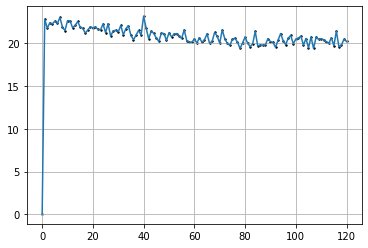

In [100]:
xax = np.arange(0,len(M_rew))
scatter(xax,M_rew,s=2,c='k')
plot(M_rew)#[:2])

grid(True)

In [101]:
mean(M_rew)

20.733983471074378